## Table of Contents

* [Scenario](#chapter1)
* [About the project](#chapter2)
    
* [1.Businesses Data Analysis](#chapter1)
    * [1.How many businesses were founded before 1000 ?](#section_1_1)
    * [2.What is the business category of the oldest businesses ? ](#section_1_2)
    * [3.Oldest business by country ](#section_1_3)
    * [4.Oldest Business by continent](#section_1_4)
    * [5.How many businesses do we have per business category](#section_1_5)
    * [6.How many businesses by continent ](#section_1_6)
    * [7.What are the most common categories for the oldest businesses on each continent?](#section_1_7)

## 👀 Scenario <a class="anchor" id="chapter1">
An important part of business is planning for the future and ensuring that the company survives changing market conditions. Some businesses do this really well and last for hundreds of years.BusinessFinancing.co.uk researched the oldest company that is still in business in (almost) every country and compiled the results into a dataset.

## ❓ About the project <a class="anchor" id="chapter2">
The objective of this project is to analyze the database and see what did they found.
The database contains three tables.
<h3 id="categories"><code>categories</code></h3>
 
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| category_code              |  Code for the category of the business.  |
| Category                | Description of the business category.                 |

</div>
    
    
<h3 id="countries"><code>countries</code></h3>
 
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| country_code             |  ISO 3166-1 3-letter country code. |
| country              | Name of the country.                |
| continent              | 	Name of the continent that the country exists in.            |
    
</div>

<h3 id="countries"><code>businesses</code></h3>    
    
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| business            |  Name of the business. |
| year_founded            | Year the business was founded.               |
| category_code             | 	Code for the category of the business.           |
| country_code             | 	ISO 3166-1 3-letter country code.         |
    
</div>

In [1]:
# Loading the libraries 
library(RODBC)
library(odbc)
library(readr)
library(ggplot2)
library(data.table)
library(dplyr)
library(corrplot)

Warning message:
"package 'odbc' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



In [2]:
# loading the SQL Connection
conn <- odbcConnect("sqlconnect")
conn

RODBC Connection 1
Details:
  case=nochange
  DSN=sqlconnect
  UID=
  Trusted_Connection=Yes
  WSID=AICHA
  DATABASE=master

In [4]:
# loading the dataframes into R 
Businesses <- read.csv("C:/Users/Atolb/businesses.csv",sep=",")
Categories <- read.csv("C:/Users/Atolb/categories.csv",sep=",")
Countries <- read.csv("C:/Users/Atolb/countries.csv",sep=",")

In [8]:
df1 <- sqlQuery(conn, "CREATE TABLE businesses (
  business VARCHAR(64) PRIMARY KEY,
  year_founded INT,
  category_code VARCHAR(5),
  country_code CHAR(3)
);", 
                errors=FALSE)

df2 <- sqlQuery(conn, "CREATE TABLE countries (
  country_code CHAR(3) PRIMARY KEY,
  country VARCHAR(50),
  continent VARCHAR(20)
);", 
                errors=FALSE)

df3 <- sqlQuery(conn, "CREATE TABLE categories (
  category_code VARCHAR(5) PRIMARY KEY,
  category VARCHAR(50)
);", 
                errors=FALSE)


In [9]:
# fetching the table into SQL
Businessdb <- sqlFetch(conn, "businesses")
Businessdb

# fetching the table into SQL
countriesdb <- sqlFetch(conn, "countries")
countriesdb

# fetching the table into SQL
categoriesdb <- sqlFetch(conn, "categories")
categoriesdb

business,year_founded,category_code,country_code


country_code,country,continent


category_code,category


In [10]:
# Loading the dataframes into the sql tables 
sqlSave(conn,Businesses, "businesses", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)
sqlSave(conn,Categories, "categories", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)
sqlSave(conn,Countries, "countries", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)

## 1. How many businesses were founded before 1000 ? <a class="anchor" id="section_1_1">

In [12]:
Businesses_before_1000 <- sqlQuery(conn,"SELECT TOP(10) * from businesses
where year_founded < 1000 
order by year_founded ASC ")
Businesses_before_1000

business,year_founded,category_code,country_code
KongÅ Gumi,578,CAT6,JPN
St. Peter Stifts Kulinarium,803,CAT4,AUT
StaffelterÂ Hof Winery,862,CAT9,DEU
Monnaie de ParisÂ,864,CAT12,FRA
The Royal Mint,886,CAT12,GBR
Sean's Bar,900,CAT4,IRL


##### Now that we know the oldest businesses , we are interested in knowing what do these companies do ? the category codes don't inform anything about the activity of these companies.

## 2. What is the business category of the oldest businesses ?  <a class="anchor" id="section_1_2">

In [13]:
Businesses_before_1000_category <- sqlQuery(conn,"SELECT TOP(10)  B.business , B.year_founded , C.category  from businesses B 
INNER JOIN Categories C ON B.category_code = C.category_code
where year_founded < 1000 
order by year_founded ASC
")
Businesses_before_1000_category

business,year_founded,category
KongÅ Gumi,578,Construction
St. Peter Stifts Kulinarium,803,"CafÃ©s, Restaurants & Bars"
StaffelterÂ Hof Winery,862,"Distillers, Vintners, & Breweries"
Monnaie de ParisÂ,864,Manufacturing & Production
The Royal Mint,886,Manufacturing & Production
Sean's Bar,900,"CafÃ©s, Restaurants & Bars"


##### The oldest company in the world is a construction company. In this list of six companies , we can see that we also have two businesses operating in the cafe , Restaurants & Bars category , followed by 2 other companies recorded as "Manufacturing & Production" which are Mints , that is they produce currency.

## 3. Oldest business by country <a class="anchor" id="section_1_3">
Let's look at where in the world these oldest businesses are. 

In [16]:
Businesses_country <- sqlQuery(conn,"SELECT TOP(10)  B.business , B.year_founded , c.country  from businesses B 
INNER JOIN countries C ON B.country_code = C.country_code
WHERE b.year_founded < 1000
order by year_founded ASC
")
Businesses_country

business,year_founded,country
KongÅ Gumi,578,Japan
St. Peter Stifts Kulinarium,803,Austria
StaffelterÂ Hof Winery,862,Germany
Monnaie de ParisÂ,864,France
The Royal Mint,886,United Kingdom
Sean's Bar,900,Ireland


##### The oldest business was founded in Japan. Kongō Gumi Co., Ltd   which is a japanese construction company that  mainly works on the design, construction, restoration, and repair of shrines, temples, castles, and cultural heritage buildings.
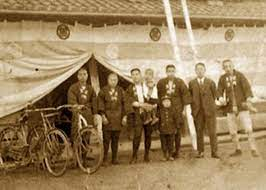

## 4. Oldest Business by continent <a class="anchor" id="section_1_4">

In [18]:
Businesses_continent <- sqlQuery(conn,"SELECT TOP(10)  B.business , B.year_founded , c.country , C.continent from businesses B 
INNER JOIN countries C ON B.country_code = C.country_code
WHERE b.year_founded < 1000
order by year_founded ASC
")
Businesses_continent

business,year_founded,country,continent
KongÅ Gumi,578,Japan,Asia
St. Peter Stifts Kulinarium,803,Austria,Europe
StaffelterÂ Hof Winery,862,Germany,Europe
Monnaie de ParisÂ,864,France,Europe
The Royal Mint,886,United Kingdom,Europe
Sean's Bar,900,Ireland,Europe


##### As we can see most of the oldest businesses are in Europe.

## 5. How many businesses do we have per business category <a class="anchor" id="section_1_5">

In [14]:
Businesses_category <- sqlQuery(conn,"SELECT count(B.business) AS 'Number of Businesses' , C.category from businesses B
INNER JOIN Categories C ON B.category_code = C.category_code
GROUP BY C.category
ORDER BY [Number of Businesses] DESC;
")
Businesses_category

Number of Businesses,category
37,Banking & Finance
22,"Distillers, Vintners, & Breweries"
19,Aviation & Transport
16,Postal Service
15,Manufacturing & Production
7,Media
6,Food & Beverages
6,Agriculture
6,"CafÃ©s, Restaurants & Bars"
4,Retail


#####  As we can see , the "Banking & Finance" is the most popular category followed by the category of Distillers, Vintners, & Breweries

## 6. How many businesses by continent <a class="anchor" id="section_1_6">
let's see how many businesses by continent

In [20]:
Businesses_continent <- sqlQuery(conn,"SELECT count(B.business) AS 'Number of Businesses' , C.continent from businesses B
INNER JOIN countries C ON C.country_code = B.country_code
GROUP BY C.continent
ORDER BY [Number of Businesses] DESC
")
Businesses_continent

Number of Businesses,continent
50,Africa
42,Asia
42,Europe
17,North America
9,South America
3,Oceania


##### It seems that Africa has most Businesses followed by Asia and Europe.

## 7. What are the most common categories for the oldest businesses on each continent? <a class="anchor" id="section_1_7">

In [21]:
Businesses_category_continent <- sqlQuery(conn,"SELECT count(B.business) AS 'Number of Businesses' , C.continent,CAT.category from businesses B
INNER JOIN countries C ON C.country_code = B.country_code
INNER JOIN categories CAT ON CAT.category_code = B.category_code
GROUP BY CAT.category, c.continent
ORDER BY [Number of Businesses] DESC")
Businesses_category_continent

Number of Businesses,continent,category
17,Africa,Banking & Finance
12,Europe,"Distillers, Vintners, & Breweries"
10,Africa,Aviation & Transport
9,Africa,Postal Service
8,Europe,Manufacturing & Production
7,Asia,Aviation & Transport
6,Asia,Banking & Finance
5,Europe,Banking & Finance
5,North America,"Distillers, Vintners, & Breweries"
4,Europe,Postal Service
